# "Selling California": Are House Prices Equivalent to House Values?

This project was created by Aarthi Kannan, Vennila Annamalai, Harshil Ganesha Murthy, and Vikash Giritharan as a part of the General Membership program from Data Science Society @ UC Berkeley. Special thanks to Manas Khatore for his mentorship throughout the process.

### Background and Hypothesis

In the midst of the national housing crisis, California's housing prices have been rather insane, to say the least. Not only does there seem to be a supply shortage, but with increasing demand, the prices have skyrocketed–putting lower-income earners at an even higher risk. But how pervasive is this issue? When discussing the implications of housing prices within the Bay Area, we were intrigued by the relationship between housing prices and overall house values in the state of California.

Even within our own project team, two of us are from California (Fremont) while the rest of us are from Minnesota (Twin Cities) and the disparity in house prices are quite shocking! To put things in perspective, while discussing house prices, we found that a 4,000 square foot house with 5 bedrooms and 5 bathrooms in Minnesota was priced near 600,000 dollars whereas in California, it would easily be more than 1.7 million dollars.

We hypothesized that median house prices will be far greater than median house values across the board in the state of California. To test our hypothesis, we chose to gather the price and value of houses in the state of California using Zillow data along with general real estate trends. 

Although this may seem easier to hypothesize based on conceptual data, in order to assess the extent to which this problem impacts everyday residents of California, the potential findings from analyzing this data could illustrate the depths to which sellers and realtors are taking advantage of the supply shortage. More importantly, what effect this may have on the overall state of homelessness in the state, as higher housing prices can lead to fewer low-income individuals to be able to find a roof over their head. In fact, as the US Interagency Council on Houselessness explains in their January 2020 issue, "California had an estimated 161,548 experiencing homelessness on any given day, as reported by Continuums of Care to the U.S. Department of Housing and Urban Development (HUD). Of that Total, 8,030 were family households, 11,401 were Veterans, 12,172 were unaccompanied young adults (aged 18-24), and 51,785 were individuals experiencing chronic homelessness.

In [ ]:
# importing libraries to be used in Deepnote (feel free to add more!)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Data Collection

We started by obtaining data from Zillow covering the median prices of houses in ten California metropolitan statistical areas (MSA). We cleaned up the data for median prices by dropping irrelevant categories such as the region ID and size rank columns.

In [ ]:
zillow_medianprices = pd.read_csv('ZillowMedianPrices.csv')
zillow_medianprices_CA = zillow_medianprices.loc[zillow_medianprices['StateName'] == 'CA'].drop(['SizeRank', 'RegionID'], axis = 1)
zillow_medianprices_CA

,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,798667.0,803521.0,819121.0,836121.0,848567.0,849633.0,841300.0,...,1009596.0,1009629.0,999666.0,994000.0,977000.0,956667.0,945333.0,945333.0,949333.0,952667.0
11,"San Francisco, CA",Msa,CA,807333.0,824000.0,857667.0,899667.0,924667.0,937963.0,921296.0,...,990333.0,993667.0,996000.0,980000.0,960000.0,936667.0,926333.0,914333.0,902665.0,895998.0
13,"Riverside, CA",Msa,CA,390000.0,392667.0,396000.0,402666.0,406633.0,409966.0,409933.0,...,506633.0,520633.0,534913.0,543213.0,547546.0,549966.0,551633.0,553113.0,553113.0,551477.0
17,"San Diego, CA",Msa,CA,704633.0,721300.0,735967.0,749333.0,749633.0,749633.0,742633.0,...,855667.0,855633.0,855300.0,848967.0,845666.0,842333.0,842666.0,845966.0,849600.0,853233.0
25,"Sacramento, CA",Msa,CA,462983.0,468667.0,476983.0,485817.0,491817.0,492333.0,487167.0,...,596494.0,608000.0,623000.0,625000.0,623000.0,621333.0,621333.0,624663.0,632993.0,641327.0
34,"San Jose, CA",Msa,CA,1071296.0,1104629.0,1154629.0,1208333.0,1245000.0,1261333.0,1244333.0,...,1253667.0,1270332.0,1283665.0,1296331.0,1280000.0,1271852.0,1258852.0,1241518.0,1215667.0,1230667.0
56,"Fresno, CA",Msa,CA,334730.0,331727.0,331693.0,334972.0,339840.0,342291.0,342462.0,...,398333.0,412333.0,422333.0,424000.0,421667.0,423000.0,428492.0,435158.0,442158.0,446633.0
63,"Bakersfield, CA",Msa,CA,249089.0,252008.0,257446.0,263542.0,267039.0,268306.0,267825.0,...,299933.0,311600.0,318300.0,324569.0,322903.0,322903.0,322967.0,331333.0,340330.0,342330.0
66,"Ventura, CA",Msa,CA,779665.0,780998.0,777665.0,785667.0,779319.0,772652.0,756319.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,"Stockton, CA",Msa,CA,381300.0,383267.0,381633.0,383300.0,384317.0,390983.0,392650.0,...,506600.0,516263.0,537929.0,554629.0,568333.0,568333.0,560000.0,560650.0,570650.0,586983.0


Next, we obtained house values from Zillow for houses for the same ten MSAs and cleaned the data by dropping the same columns we dropped in the median prices table.

In [ ]:
zillow_housevalue = pd.read_csv('ZillowHouseValue.csv')
zillow_housevalue_CA = zillow_housevalue.loc[zillow_housevalue['StateName'] == 'CA'].drop(['SizeRank', 'RegionID'], axis = 1)
zillow_housevalue_CA

,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231141.0,231946.0,233179.0,235523.0,238036.0,240408.0,242839.0,...,767442.0,783105.0,802909.0,823806.0,837248.0,846358.0,851116.0,858319.0,867616.0,878396.0
11,"San Francisco, CA",Msa,CA,356800.0,358708.0,361368.0,368640.0,377816.0,386354.0,393828.0,...,1221359.0,1249813.0,1282721.0,1316235.0,1336965.0,1349165.0,1353613.0,1363362.0,1374422.0,1391474.0
13,"Riverside, CA",Msa,CA,143956.0,144698.0,145338.0,146637.0,147809.0,149028.0,150208.0,...,452624.0,464260.0,477380.0,492449.0,506258.0,518001.0,525035.0,529532.0,534490.0,544220.0
17,"San Diego, CA",Msa,CA,228853.0,230099.0,231448.0,234456.0,237341.0,241082.0,244961.0,...,719643.0,740781.0,765128.0,789136.0,803874.0,813658.0,818427.0,826012.0,837420.0,857991.0
25,"Sacramento, CA",Msa,CA,173259.0,173917.0,174747.0,176283.0,177967.0,179448.0,181343.0,...,501831.0,511814.0,524887.0,540273.0,554120.0,564964.0,568802.0,571779.0,575412.0,583329.0
34,"San Jose, CA",Msa,CA,437148.0,439771.0,443523.0,454228.0,464483.0,476647.0,486040.0,...,1352614.0,1391661.0,1439698.0,1477560.0,1498828.0,1505111.0,1514055.0,1528797.0,1549756.0,1578375.0
56,"Fresno, CA",Msa,CA,121248.0,121412.0,119976.0,119026.0,117942.0,118509.0,118844.0,...,316604.0,323959.0,331603.0,340951.0,349249.0,356215.0,359221.0,361977.0,364020.0,369498.0
63,"Bakersfield, CA",Msa,CA,108969.0,109006.0,107691.0,106710.0,105879.0,106414.0,106782.0,...,271428.0,275835.0,281928.0,288437.0,295834.0,302686.0,308485.0,311876.0,313603.0,315415.0
66,"Ventura, CA",Msa,CA,263527.0,264478.0,265753.0,268104.0,270486.0,272927.0,276088.0,...,696125.0,NaN,737988.0,760026.0,776766.0,788054.0,793259.0,797421.0,803710.0,815907.0
77,"Stockton, CA",Msa,CA,165819.0,164739.0,164814.0,165039.0,166502.0,168127.0,170367.0,...,451664.0,461345.0,474936.0,494169.0,508800.0,519998.0,523935.0,526471.0,526795.0,530466.0


For this model, we used a data set from kaggle that contains housing information for various houses throught out California. It contains information such as price, year built, square footage and more.

In [ ]:
kaggle = pd.read_csv('RealEstate_California.csv')
kaggle_dataset = kaggle.dropna()
kaggle_dataset

,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,35384,90036-20610069,9,130313,12447,USA,2021-06-19,0,0,Listing removed,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35385,35385,90036-20610391,9,130314,12447,USA,2021-06-17,0,0,Listing removed,...,1,2.0,1,0,0,0,0,0,SINGLE_FAMILY,Los Angeles County
35386,35386,95062-16111852,9,130368,13715,USA,2021-06-21,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County
35387,35387,95062-16111367,9,130369,13715,USA,2021-06-11,0,0,Listed for sale,...,1,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Cruz County


### Visualizations

We created two scatterplots to compare the trends of median house price and house value for the ten metropolitan statistical areas (MSA) in California. Based on the two visualizations, it can be noted that the MSAs with higher house values over the years also have higher median prices overall. 

We converted the house value data values into lists for each MSA, and graphed the values for each MSA against months spanning from January 2000 to January 2022. From the housing values visualizations, we can observe that the house value trends are similar for all the MSAs, with the value increasing until about 2007, then decreasing until 2012, and then steadily increases after that.

Text(0, 0.5, 'Price (in millions of USD)')

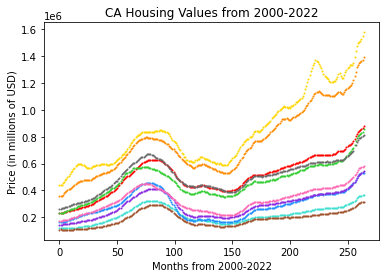

In [ ]:
# house value
tbl_rows_list = zillow_housevalue_CA.values.tolist()
los_angeles = tbl_rows_list[0][3:]
san_francisco = tbl_rows_list[1][3:]
riverside = tbl_rows_list[2][3:]
san_diego = tbl_rows_list[3][3:]
sacramento = tbl_rows_list[4][3:]
san_jose = tbl_rows_list[5][3:]
fresno = tbl_rows_list[6][3:]
bakersfield = tbl_rows_list[7][3:]
ventura = tbl_rows_list[8][3:]
stockton = tbl_rows_list[9][3:]
month_nums = range(len(los_angeles))
plt.scatter(x=month_nums, y=los_angeles, s=1, c='red')
plt.scatter(x=month_nums, y=san_francisco, s=1, c='darkorange')
plt.scatter(x=month_nums, y=san_jose, s=1, c='gold')
plt.scatter(x=month_nums, y=san_diego, s=1, c='limegreen')
plt.scatter(x=month_nums, y=fresno, s=1, c='turquoise')
plt.scatter(x=month_nums, y=stockton, s=1, c='dodgerblue')
plt.scatter(x=month_nums, y=riverside, s=1, c='blueviolet')
plt.scatter(x=month_nums, y=sacramento, s=1, c='hotpink')
plt.scatter(x=month_nums, y=bakersfield, s=1, c='sienna')
plt.scatter(x=month_nums, y=ventura, s=1, c='dimgray')
plt.title("CA Housing Values from 2000-2022")
plt.xlabel("Months from 2000-2022")
plt.ylabel("Price (in millions of USD)")

For the median prices, we followed the same steps by converting the median price data values into lists for each MSA, and graphed the values for each MSA against months spanning from January 2018 to January 2022. 

Text(0, 0.5, 'Price (in millions of USD)')

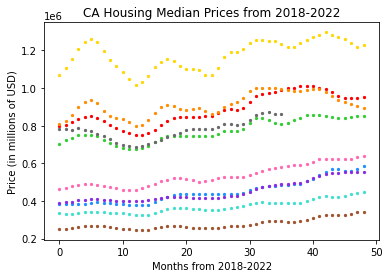

In [ ]:
# median prices
med_rows_list = zillow_medianprices_CA.values.tolist()
med_los_angeles = med_rows_list[0][3:]
med_san_francisco = med_rows_list[1][3:]
med_riverside = med_rows_list[2][3:]
med_san_diego = med_rows_list[3][3:]
med_sacramento = med_rows_list[4][3:]
med_san_jose = med_rows_list[5][3:]
med_fresno = med_rows_list[6][3:]
med_bakersfield = med_rows_list[7][3:]
med_ventura = med_rows_list[8][3:]
med_stockton = med_rows_list[9][3:]
med_month_nums = range(len(med_los_angeles))
plt.scatter(x=med_month_nums, y=med_los_angeles, s=5, c='red')
plt.scatter(x=med_month_nums, y=med_san_francisco, s=5, c='darkorange')
plt.scatter(x=med_month_nums, y=med_san_jose, s=5, c='gold')
plt.scatter(x=med_month_nums, y=med_san_diego, s=5, c='limegreen')
plt.scatter(x=med_month_nums, y=med_fresno, s=5, c='turquoise')
plt.scatter(x=med_month_nums, y=med_stockton, s=5, c='dodgerblue')
plt.scatter(x=med_month_nums, y=med_riverside, s=5, c='blueviolet')
plt.scatter(x=med_month_nums, y=med_sacramento, s=5, c='hotpink')
plt.scatter(x=med_month_nums, y=med_bakersfield, s=5, c='sienna')
plt.scatter(x=med_month_nums, y=med_ventura, s=5, c='dimgray')
plt.title("CA Housing Median Prices from 2018-2022")
plt.xlabel("Months from 2018-2022")
plt.ylabel("Price (in millions of USD)")

### A/B Testing

We are testing to see if there is any statistically significant difference between housing value and median price of houses in 10 major regions of CA with a significance value of p = 0.05. We are using A/B Testing to determine if it is significant. A/B testing is done by creating a set of data with labels, and then randomizing the labels to create a distribution of the correlated values. Then, the original observed statistic is compared to the distribution of randomized labels.

The null hypothesis is that there is no statistically significant difference between the median prices and house value for the specified region, and the alternate hypothesis is that there is a statistically significant difference between the median prices and house value. 

This is an example of how A/B testing works, using Los Angeles as the sample city. The first two tables are the median house prices and median house values for the 13 most recent months of the given data.


In [ ]:
la_medians = zillow_medianprices_CA.loc[zillow_medianprices_CA['RegionName'] == 'Los Angeles-Long Beach-Anaheim, CA']
la_median_vals = la_medians.values.tolist()[0][-13:]
median_labels = ['Median Price' for i in range(13)]
la_median_data = {'Label': median_labels, 'Values': la_median_vals}
la_median_df = pd.DataFrame(la_median_data)
la_median_df

,Label,Values
0,Median Price,997667.0
1,Median Price,999300.0
2,Median Price,1009263.0
3,Median Price,1009596.0
4,Median Price,1009629.0
5,Median Price,999666.0
6,Median Price,994000.0
7,Median Price,977000.0
8,Median Price,956667.0
9,Median Price,945333.0


In [ ]:
la_house = zillow_housevalue_CA.loc[zillow_housevalue_CA['RegionName'] == 'Los Angeles-Long Beach-Anaheim, CA']
la_house_vals = la_house.values.tolist()[0][-13:]
house_labels = ['House Value' for i in range(13)]
la_house_data = {'Label': house_labels, 'Values': la_house_vals}
la_house_df = pd.DataFrame(la_house_data)
la_house_df


,Label,Values
0,House Value,741042.0
1,House Value,748530.0
2,House Value,756399.0
3,House Value,767442.0
4,House Value,783105.0
5,House Value,802909.0
6,House Value,823806.0
7,House Value,837248.0
8,House Value,846358.0
9,House Value,851116.0


We then combine the two tables into one dataframe and calculate the observed difference between median house prices and house values.

In [ ]:
# concatenating the tables (median_vs_house) and calculating the OBSERVED test statistic
# we are plotting the OBSERVED test statistic (reality) against our simulated values to determine the p-value

frames = [la_median_df, la_house_df]
median_vs_house = pd.concat(frames)
shuffled_labels = median_vs_house.sample(n = 13)['Label']

def test_stat(tbl):
    med_values = tbl.loc[(tbl['Label'] == 'Median Price')]
    house_values = tbl.loc[(tbl['Label'] == 'House Value')]
    return med_values['Values'].mean() - house_values['Values'].mean()

observed_difference = test_stat(median_vs_house)
print("The observed difference is", observed_difference)

The observed difference is 167936.0


This function creates a single randomized sample and calculates a test statistic for the sample. Then, we repeat the process a 1000 times and create an array of all the statistics.

In [ ]:
# function that calculates one simulated difference

def one_simulated_difference():
    shuffled_labels = median_vs_house.sample(n = 26)['Label']
    shuffled_table = median_vs_house.drop(columns = ['Label'])
    shuffled_table['Label'] = shuffled_labels.tolist()
    return test_stat(shuffled_table)

print("This randomized sample had a difference of", one_simulated_difference())

This randomized sampple had a difference of -30330.0


In [ ]:
differences = []
for i in range(1000): # this takes a LONG time to run, maybe consider reducing the number of simulations
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)
differences_df = pd.DataFrame(differences, columns = ['Differences'])
differences_df

,Differences
0,14069.692308
1,2782.461538
2,-3644.153846
3,-30912.615385
4,25919.384615
...,...
995,-12019.538462
996,17263.076923
997,24249.538462
998,-12055.692308


In [ ]:
# calculates the p-value by determining the proportion of simulated differences that are above the observed val

above_observed = differences_df.loc[differences_df['Differences'] >= observed_difference]
above_observed.astype(bool).sum(axis=0)/10000

Differences    0.0
dtype: float64

Finally, we compiled all the code into a single function which allows us to run the A/B testing for all 10 regions by calling just this function. It also displays a histogram of the distribution and the p-value.

In [ ]:
def ab_testing(region_name): 
    #Creates a dataframe of 13 median values from all the median prices of houses in the given region_name
    medians = zillow_medianprices_CA.loc[zillow_medianprices_CA['RegionName'] == region_name] 
    median_vals = medians.values.tolist()[0][-13:] 
    median_labels = ['Median Price' for i in range(13)] 
    median_data = {'Label': median_labels, 'Values': median_vals}
    median_df = pd.DataFrame(median_data)
    #Creats a dataframe of 13 house values from the region
    house = zillow_housevalue_CA.loc[zillow_housevalue_CA['RegionName'] == region_name]
    house_vals = house.values.tolist()[0][-13:]
    house_labels = ['House Value' for i in range(13)]
    house_data = {'Label': house_labels, 'Values': house_vals}
    house_df = pd.DataFrame(house_data)
    #Combines the median and house value data frames
    frames = [median_df, house_df]
    median_vs_house = pd.concat(frames)

    observed_difference = test_stat(median_vs_house)
    
    # Creates an array of 1000 simulated test statistics
    differences = []
    for i in range(1000): # this takes a LONG time to run, maybe consider reducing the number of simulations
        new_difference = one_simulated_difference()
        differences = np.append(differences, new_difference)
    differences_df = pd.DataFrame(differences, columns = ['Differences'])

    # Create histogram and plot the observed statistic as well
    differences_df.hist()
    plt.scatter(observed_difference, -0.002, color='red', s=40)
    plt.title(region_name)
    mean_sim_diff = np.mean(differences_df['Differences'])
    if observed_difference > mean_sim_diff:
        above_observed = differences_df.loc[differences_df['Differences'] >= observed_difference]
    else:
        above_observed = differences_df.loc[differences_df['Differences'] <= observed_difference]
    return len(above_observed)/1000


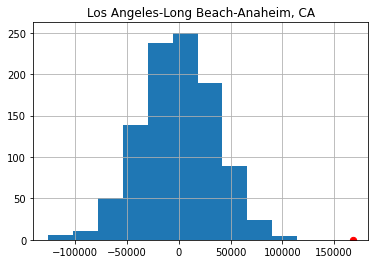

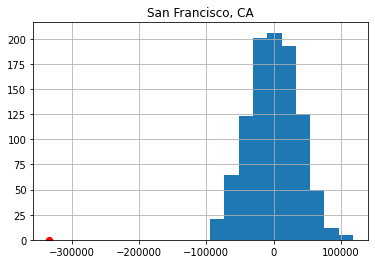

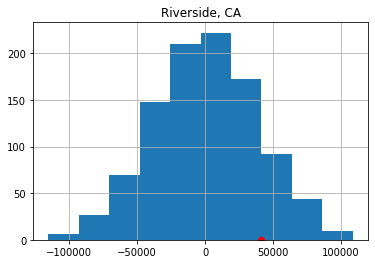

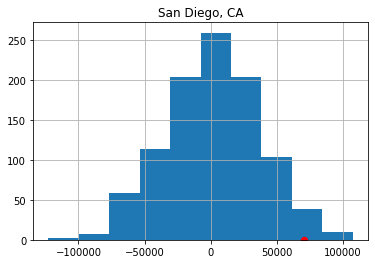

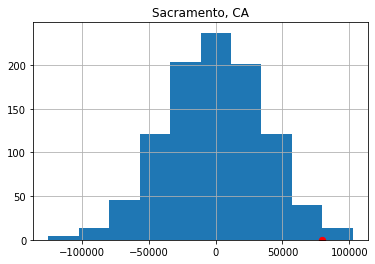

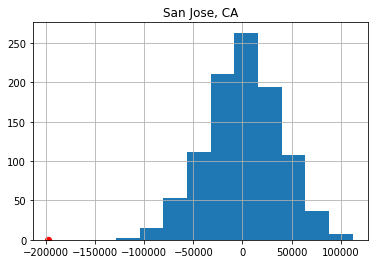

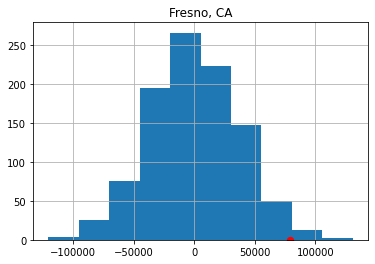

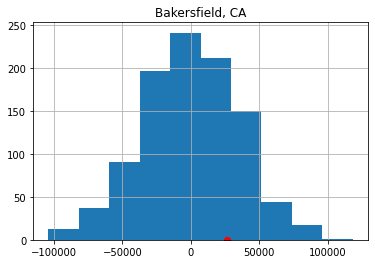

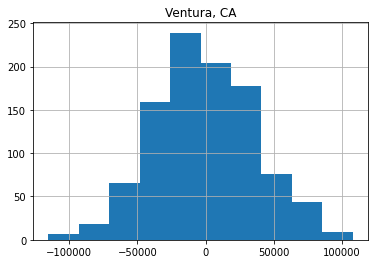

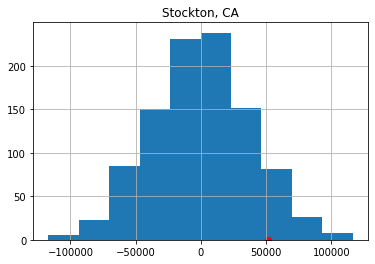

In [ ]:
dict = {'Los Angeles': ab_testing('Los Angeles-Long Beach-Anaheim, CA'), 'San Francisco': ab_testing('San Francisco, CA'),
         'Riverside': ab_testing('Riverside, CA'), 'San Diego': ab_testing('San Diego, CA'), 'Sacramento': ab_testing('Sacramento, CA'), 
         'San Jose': ab_testing('San Jose, CA'), 'Fresno':ab_testing('Fresno, CA'), 'Bakersfield':ab_testing('Bakersfield, CA'),
         'Ventura':ab_testing('Ventura, CA'), 'Stockton': ab_testing('Stockton, CA')} 



In [ ]:
#Dataframe of the p-values for all the regions' p-values
locations = list(dict.keys())
p_values = list(dict.values())
results = ["Fail to reject the null" if dict[loc] > 0.05 else "Reject the null" for loc in locations]
ca_pvals = {"CA Region": locations, "P-Values": p_values, "Results": results}
ca_pvals_df = pd.DataFrame(ca_pvals)
ca_pvals_df


,CA Region,P-Values,Results
0,Los Angeles,0.000,Reject the null
1,San Francisco,0.000,Reject the null
2,Riverside,0.132,Fail to reject the null
3,San Diego,0.031,Reject the null
4,Sacramento,0.013,Reject the null
5,San Jose,0.000,Reject the null
6,Fresno,0.016,Reject the null
7,Bakersfield,0.245,Fail to reject the null
8,Ventura,0.000,Reject the null
9,Stockton,0.079,Fail to reject the null


In the table above, we can see that in 7 of the 10 cities, we are able to reject the null. This means that for those cities, there is a statistically significant difference between house values and house prices.

### Machine Learning Model

We are able to create a model using price and the year built to determine the location of a house. We began by comparing San Franciso and Fresno and then made a generalized CityPredict function which predicts which city a house is in.

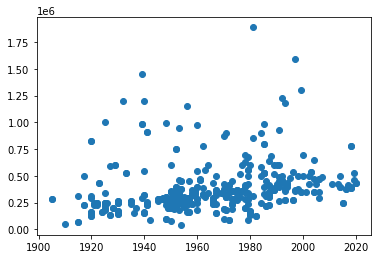

In [ ]:
fres_kaggle = kaggle.loc[kaggle['city'] == 'Fresno']
fres_kaggle = fres_kaggle.loc[0 != fres_kaggle['yearBuilt']]
fres_kaggle = fres_kaggle.loc[fres_kaggle['price'] != 0]
fres_kaggle[['price']]
fres_kaggle = fres_kaggle.loc[fres_kaggle['price']<2000000]

plt.scatter(x = fres_kaggle['yearBuilt'], y = fres_kaggle['price'])

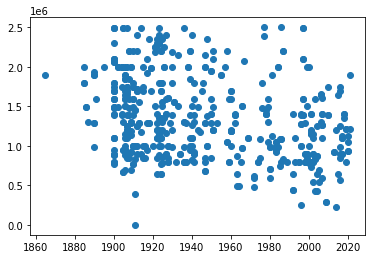

In [ ]:
sf_kaggle = kaggle.loc[kaggle['city'] == 'San Francisco']
sf_kaggle = sf_kaggle.loc[0 != sf_kaggle['yearBuilt']]
sf_kaggle = sf_kaggle.loc[sf_kaggle['price'] != 0]
sf_kaggle = sf_kaggle.loc[sf_kaggle['yearBuilt'] != 9999]
sf_kaggle = sf_kaggle.loc[sf_kaggle['price']<2500000]
sf_kaggle[['price']]

plt.scatter(x = sf_kaggle['yearBuilt'], y = sf_kaggle['price'])

Then we combined the San Francisco and Fresno into one data frame so we could plot data for both cities on the same graph.

In [ ]:
sf_fres_data = pd.concat([sf_kaggle, fres_kaggle])
sf_fres_data = sf_fres_data[["city","price","yearBuilt"]]

sf_fres_data # contains data for both SF and Fresno

,city,price,yearBuilt
687,San Francisco,1295000.0,1913
689,San Francisco,799000.0,1959
690,San Francisco,2495000.0,1905
697,San Francisco,2065000.0,1900
699,San Francisco,1595000.0,1900
...,...,...,...
33176,Fresno,289000.0,1956
33177,Fresno,295000.0,1975
33178,Fresno,265000.0,1966
33503,Fresno,250000.0,1954


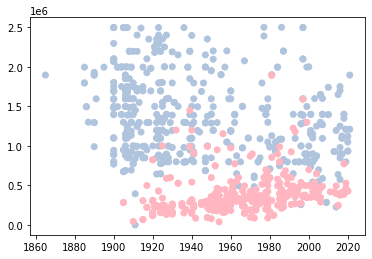

In [ ]:
colors = {'San Francisco': 'LightSteelBlue', 'Fresno':'LightPink'}
plt.scatter(x = sf_fres_data['yearBuilt'], y = sf_fres_data['price'], c=sf_fres_data['city'].map(colors))

In [ ]:
x = sf_fres_data[['yearBuilt', 'price']]
y = sf_fres_data[['city']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

We used k-Nearest neighbors to help the model learn different geographical regions based on price and year built. It essentially classifies which region a certain household is in based on which training point is closest.

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9027027027027027

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=7)
neigh.fit(x)

NearestNeighbors(n_neighbors=7)

In [ ]:
neigh.kneighbors_graph(x)

<922x922 sparse matrix of type '<class 'numpy.float64'>'
	with 6454 stored elements in Compressed Sparse Row format>

Similar to our A/B testing function, we wrote a few functions to help us compare other cities to San Francisco. The function citydatacollect selects one city from the Kaggle data and cleans out any irrelevant values. 

In [ ]:
def citydatacollect(city1):
    kaggle_city1 = kaggle.loc[kaggle['city'] == city1]
    kaggle_city1 = kaggle_city1.loc[0 != kaggle_city1['yearBuilt']]
    kaggle_city1 = kaggle_city1.loc[kaggle_city1['price'] != 0]
    kaggle_city1 = kaggle_city1.loc[kaggle_city1['yearBuilt'] != 9999]
    kaggle_city1 = kaggle_city1.loc[kaggle_city1['price']<2000000]
    return kaggle_city1



The concatenate function takes two cities and makes a data frame with the city name, house price, and year built.

In [ ]:
def concatenate(city1, city2):
    city1_kaggle = citydatacollect(city1)
    city2_kaggle = citydatacollect(city2)
    city_data = pd.concat([city1_kaggle, city2_kaggle])
    city_data = city_data[["city","price","yearBuilt"]]
    return city_data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
def kNearest(df_concat):
    x = df_concat[['yearBuilt', 'price']]
    y = df_concat['city']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    scalar = StandardScaler()
    scalar.fit(x_train)
    x_train = scalar.transform(x_train)
    x_test = scalar.transform(x_test)
    classifier = KNeighborsClassifier(n_neighbors=7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    return metrics.accuracy_score(y_test, y_pred)

In [ ]:
def CityPredict(city1):
    combined_df = concatenate("San Francisco",city1)
    colors = {"San Francisco": 'LightSteelBlue', city1:'LightPink'}
    plt.figure()
    plt.scatter(x = combined_df['yearBuilt'], y = combined_df['price'], c=combined_df['city'].map(colors))
    plt.title("San Francisco vs." + " " + city1)
    plt.xlabel("Year Built")
    plt.ylabel("Price (in millions of USD)")
    return kNearest(combined_df)


We then ran CityPredict on various cities in California and compared them to San Francisco. Below, we displayed the scatter plots for each of the cities. We can see how for some cities, such as Riverside, there is a clear distinction between San Francisco homes and Riverside homes. But for other cities, such as Los Angeles, the data points are overlapping. This would make it harder to determine whether a house was in San Francisco or in Los Angeles.

{'Los Angeles': 0.757396449704142,
 'Riverside': 0.9051094890510949,
 'San Diego': 0.7527272727272727,
 'Sacramento': 0.852017937219731,
 'San Jose': 0.7089201877934272,
 'Fresno': 0.9364161849710982,
 'Bakersfield': 0.9354838709677419,
 'Ventura': 0.8952380952380953,
 'Stockton': 0.891156462585034}

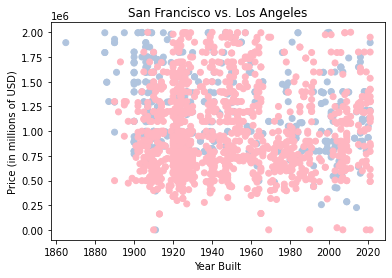

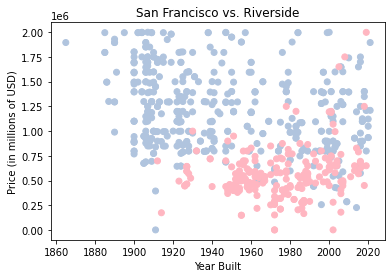

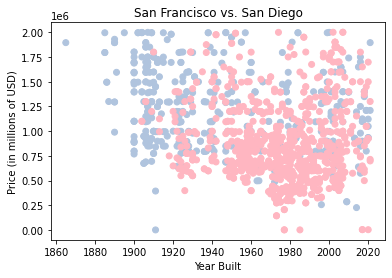

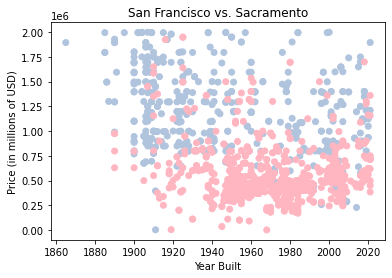

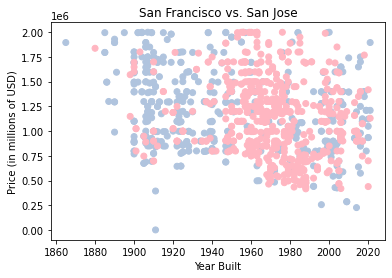

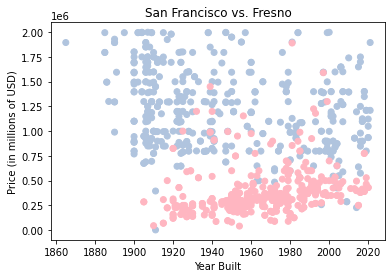

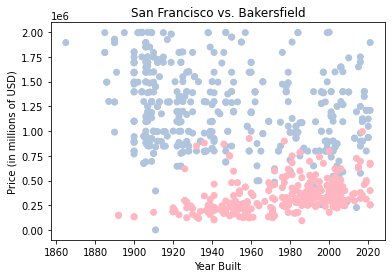

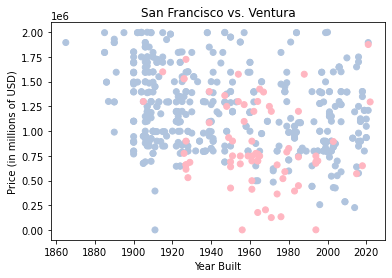

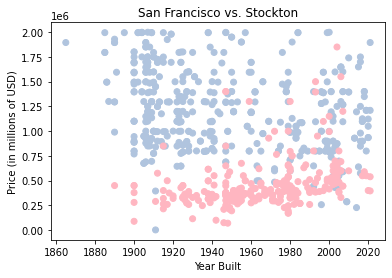

In [ ]:
prediction_dict = {"Los Angeles": CityPredict('Los Angeles'), 'Riverside': CityPredict('Riverside'), 
        'San Diego': CityPredict('San Diego'), 'Sacramento': CityPredict('Sacramento'), 
         'San Jose': CityPredict('San Jose'), 'Fresno':CityPredict('Fresno'), 'Bakersfield':CityPredict('Bakersfield'),
         'Ventura': CityPredict('Ventura'), 'Stockton': CityPredict('Stockton')}

prediction_dict

### Conclusion

In this project, we looked at real estate data in California.

We were able to show that in most of the cities in California, there is a significant difference between house value and house prices. This means that in the California housing market, prices are inflated compared to the actual value. This is because of many reasons. House value solely looks at the building itself. House prices in the market also takes into account the location of the house, schools, job opportunities, and quality of life. 

We also created a machine learning model to look at the price of a house and when it was built to determine what part of California the house is in. By looking at the K-nearest neighbors value, we saw a correlation between city size and accuracy of model. Looking at high density cities, they are very similar to San Francisco, making it hard to differentiate between the two cities. However, the accuracy was around 90% for the smaller cities.

While doing this project, we did run into some limitations. We were only using 2021 data to make our data easier to analyze. For our machine learning model, we could improve it by looking at more attributes such as square footage or features in the house. Finally, future analysis could involve looking at houses in other states as well.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aedb98d0-7842-4a31-bf88-ee6504f6731b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>